In [1]:
#get larlite
from larlite import larlite as ll

In [2]:
#create storage manager
sm = ll.storage_manager()
sm.set_io_mode(ll.storage_manager.kWRITE)
sm.set_out_filename("fakepi0.root")
sm.open()

True

In [3]:
#streamer for event_hit
event_hits = sm.get_data(ll.data.kHit,"fake_pi0")
event_vertex = sm.get_data(ll.data.kVertex,"fake_vertex")

In [4]:
#max and min wire and time
wmax = 3400.0
wmin = 0.0
tmax = 6399.0
tmin = 0.0

In [5]:
#region we want gammas in 
start1 = (wmax/60.0,tmax/60.0)
end1   = (wmax/50.0,tmax/50.0)

#gammas have some angle
slope1 = ( end1[1] - start1[1] ) / ( end1[0] - start1[0] ) * 2.0
slope2 = ( end1[1] - start1[1] ) / ( end1[0] - start1[0] ) / 2.0

In [6]:
#graphics 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

In [7]:
cone1 = lambda x : start1[1]+slope1*(x-start1[0])
cone2 = lambda x : start1[1]+slope2*(x-start1[0])

In [8]:
a=np.random.uniform(start1,end1,size=(10000,2))
gamma1=a[cone1(a[:,0])  < a[:,1]]
gamma2=a[cone2(a[:,0]) > a[:,1]]

#Move them 500 ticks down
gamma2[:,1] -= 50.0

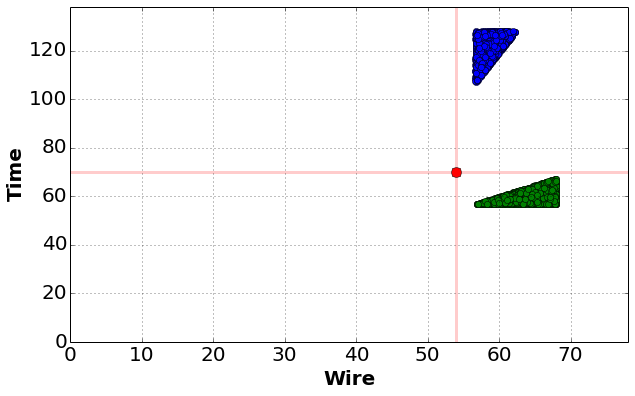

In [9]:
#show it
fig,ax=plt.subplots(figsize=(10,6))
matplotlib.rcParams['font.size']=20
matplotlib.rcParams['font.family']='serif'
ax.plot(gamma1[:,0],gamma1[:,1],'o')
ax.plot(gamma2[:,0],gamma2[:,1],'o')
ax.set_xlim(0,end1[0]+10)
ax.set_ylim(0,end1[1]+10)
ax.set_xlabel("Wire",fontweight='bold')
ax.set_ylabel("Time",fontweight='bold')
x1=54
y1=70
ax.plot([x1],[y1],'o',color='red',markersize=10)
ax.vlines(x1,0,end1[1]+10,color='red',lw=3,alpha=0.2)
ax.hlines(y1,0,end1[0]+10,color='red',lw=3,alpha=0.2)
ax.grid()
plt.show()

In [10]:
from larlite import larutil as lu
geo = lu.Geometry.GetME()
geoh= lu.GeometryHelper.GetME()

In [11]:
import ROOT

#cheap way to pass double pointer to ll.vertex's constructor
a = ROOT.std.vector("double")()

a.push_back((y1-800) * geoh.TimeToCm())
a.push_back(999) # doesn't matter
a.push_back(x1 * geoh.WireToCm())

print a[0],a[1],a[2]
vtx=ll.vertex(a.data())

-40.6740972027 999.0 16.2000006437


In [12]:
#Now that I have the vertex, if I run that 3D_to_2D function, does it actually
#give me what I want? Namely... x1 and y1 back correctly...

px = geoh.Point_3Dto2D(ROOT.TVector3(vtx.X(),vtx.Y(),vtx.Z()),2)
print px.w/geoh.WireToCm(),px.t/geoh.TimeToCm() + 800


53.6666688124 70.0


In [13]:
#store the vertex
event_vertex.push_back(vtx)

In [14]:
#store gamma 1
for g in gamma1:
    h = ll.hit()
    h.set_wire(ll.geo.WireID(1,1,2,int(g[0])))
    h.set_time_peak(g[1],0.0)
    h.set_integral(100.0,0.0)
    event_hits.push_back(h)

In [15]:
#store gamma 2
for g in gamma2:
    h = ll.hit()
    h.set_wire(ll.geo.WireID(1,1,2,int(g[0])))
    h.set_time_peak(g[1],0.0)
    h.set_integral(100.0,0.0)
    event_hits.push_back(h)

In [16]:
#Set id for larlite id tree
sm.set_id(1,1,1)

In [17]:
#call next event to store
sm.next_event()

True

In [18]:
#close that bad boi
sm.close()

True